In [1]:
import csv
import pandas as pd
import numpy as np
import keras

Using TensorFlow backend.


In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels

with open("MW.txt") as data:
    reader = csv.reader(data, delimiter='\t')
    d = list(reader)
for i in d:
    i[6]=[int(i) for i in  i[6].split(',')]
    i[6]=i[6][0:441]

In [3]:
j=1000
for m in d:
    if int(m[5])<j:
        j=int(m[5])
print(j)
print(d[1])

441
['1', '1', 'MW', 'FP1', '1', '889', [83, 74, 65, 65, 66, 55, 43, 25, 18, 20, 26, 33, 41, 38, 28, 36, 55, 60, 56, 58, 72, 85, 76, 69, 74, 83, 86, 88, 97, 112, 114, 109, 99, 76, 54, 50, 66, 86, 97, 99, 96, 86, 82, 73, 69, 70, 70, 60, 65, 71, 69, 64, 57, 54, 56, 58, 50, 20, -20, -56, -74, -69, -57, -57, -60, -69, -75, -71, -59, -45, -24, 3, 13, 10, 8, 10, 5, 7, 8, -3, -22, -28, -20, 1, 3, -10, -18, -12, -19, -23, -25, -36, -45, -43, -37, -23, -4, 4, -2, -3, -3, -2, 5, 8, 7, 5, 16, 29, 34, 35, 36, 48, 68, 80, 80, 75, 68, 69, 77, 89, 105, 100, 80, 64, 56, 59, 64, 57, 49, 42, 48, 60, 75, 77, 70, 61, 45, 28, 24, 28, 29, 34, 40, 50, 42, 27, 16, 4, 1, 6, 12, 16, 20, 24, 34, 44, 54, 58, 53, 40, 24, 11, 4, -4, -14, -34, -56, -76, -77, -68, -53, -44, -38, -35, -30, -30, -30, -25, -6, 18, 29, 27, 23, 27, 41, 50, 51, 57, 57, 51, 55, 57, 58, 53, 37, 20, 9, 12, 29, 49, 49, 37, 28, 37, 57, 76, 83, 74, 68, 50, 25, 9, 13, 39, 71, 103, 121, 130, 132, 136, 146, 163, 184, 188, 171, 152, 152, 164, 166, 1

In [22]:
dataset = pd.DataFrame(d)
X = dataset.iloc[:, 6].values
y = dataset.iloc[:, 4].values
x=[]
Y=[]
for i in y:
    if i == '-1':
        Y.append(1)
    else:
        Y.append('0')
for i in X:
    x.append(i)
X = pd.DataFrame(x)
#Y = keras.utils.to_categorical(Y)
y = pd.DataFrame(Y)
print(y.shape)
X.shape

(67635, 1)


(67635, 441)

In [24]:
print(X.T[0])
print(y[0])


0      38
1      48
2      51
3      44
4      48
       ..
436   -62
437   -60
438   -53
439   -55
440   -73
Name: 0, Length: 441, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
67630    1
67631    1
67632    1
67633    1
67634    1
Name: 0, Length: 67635, dtype: object


In [25]:
print(X.T[0])
X.isnull().sum()

0      38
1      48
2      51
3      44
4      48
       ..
436   -62
437   -60
438   -53
439   -55
440   -73
Name: 0, Length: 441, dtype: int64


0      0
1      0
2      0
3      0
4      0
      ..
436    0
437    0
438    0
439    0
440    0
Length: 441, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import *
y=np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#y_test = np_utils.to_categorical(y_test)
#y_train = np_utils.to_categorical(y_train)

X_train=np.array(X_train)

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],1))

X_test = np.array(X_test)
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],1))
y_train = keras.utils.to_categorical(y_train)
print(y_train.shape)
print(X_train.shape)
y_plot = np.array(y_test)
y_test = keras.utils.to_categorical(y_test)
print(y_test.shape)
print(X_test.shape)

(47344, 2)
(47344, 441, 1)
(20291, 2)
(20291, 441, 1)


In [30]:
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=11, activation='relu', input_shape=(441, 1)))
#model.add(Conv1D(filters=128, kernel_size=11, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=11, activation='relu'))
model.add(AveragePooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu'))
model.add(Conv1D(filters=128, kernel_size=7, activation='relu'))

model.add(AveragePooling1D(pool_size=2))
#model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss='binary_crossentropy' , optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

#keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta", **kwargs)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 431, 256)          3072      
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 421, 64)           180288    
_________________________________________________________________
average_pooling1d_7 (Average (None, 210, 64)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 210, 64)           0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 204, 128)          57472     
_________________________________________________________________
conv1d_18 (Conv1D)           (None, 198, 128)          114816    
_________________________________________________________________
average_pooling1d_8 (Average (None, 99, 128)          

In [32]:
# fit network
model.fit(X_train, y_train, epochs = 10, batch_size = 256)
# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=256, verbose=0)
print ("Test accuracy : ", accuracy)


Epoch 1/10
47344/47344 [==============================] - 41s 871us/step - loss: 0.2663 - accuracy: 0.9025
Epoch 2/10
47344/47344 [==============================] - 41s 874us/step - loss: 0.2123 - accuracy: 0.9217
Epoch 3/10
47344/47344 [==============================] - 41s 875us/step - loss: 0.1928 - accuracy: 0.9293
Epoch 4/10
47344/47344 [==============================] - 42s 877us/step - loss: 0.1897 - accuracy: 0.9310
Epoch 5/10
47344/47344 [==============================] - 42s 880us/step - loss: 0.1763 - accuracy: 0.9351
Epoch 6/10
47344/47344 [==============================] - 42s 880us/step - loss: 0.1572 - accuracy: 0.9438
Epoch 7/10
47344/47344 [==============================] - 42s 888us/step - loss: 0.1424 - accuracy: 0.9510
Epoch 8/10
47344/47344 [==============================] - 42s 884us/step - loss: 0.1323 - accuracy: 0.9546
Epoch 9/10
47344/47344 [==============================] - 42s 881us/step - loss: 0.1205 - accuracy: 0.9588
Epoch 10/10
47344/47344 [============

In [33]:
ynew = model.predict_classes(X_test)
print(ynew)
print("---------------------")
print(y_test)

[0 0 0 ... 0 0 0]
---------------------
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


  Category    TP     FP     TN    FN
0        0     0  17684   2607     0
1        1  2570     37  16385  1299 


Confusion matrix, without normalization
[[16385    37]
 [ 1299  2570]]
Accuracy:  0.9341580010842245


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:90: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


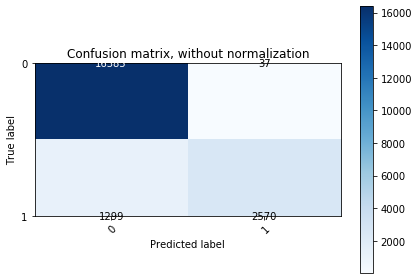

In [34]:

z=0
acc=0

import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


def perf_measure(y_actual, y_hat):
    TP, FP, TN, FN = 0, 0, 0, 0
    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        elif y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        elif y_actual[i]==y_hat[i]==0:
            TN += 1
        elif y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    return [TP, FP, TN, FN]

def display_results(test_labels, categories, predicted_categories):
    df = pd.DataFrame(columns= ['Category']+list(categories))

    cols = ['Category']+['TP', 'FP', 'TN', 'FN']
    df = pd.DataFrame(columns= cols)
    for el in categories:
        temp_y_test = (test_labels == el).astype(int)
        temp_preds = (predicted_categories == el).astype(int)
        row = [el]+ perf_measure(temp_y_test, temp_preds)
        df = df.append(pd.Series(row, index=cols), ignore_index=True)
    print(df, '\n\n')

    for i in range(len(categories)):
        test_labels[test_labels==categories[i]] = i
        predicted_categories[predicted_categories==categories[i]] = i
    test_labels, predicted_categories = test_labels.astype(int), predicted_categories.astype(int)

    class_names=np.array(categories)
    plot_confusion_matrix(test_labels, predicted_categories, classes=class_names)
    fig = plt.gcf()
    fig.show()
    
    acc = accuracy_score(y_pred=predicted_categories, y_true=test_labels) #you need to put your own array names here
    print('Accuracy: ', acc)
    
    return

display_results(y_plot, [0,1], ynew)